In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2
import warnings
warnings.filterwarnings('ignore') 
import  seaborn as sns
from datetime import date

In [93]:
flight = pd.read_csv("data.csv")
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#Preprocessing and Visualization

##Dropping NA and Duplicate values

In [94]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Dropping the NA values

In [95]:
flight.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Dropping the Duplicate values

In [96]:
flight.duplicated().sum()

220

In [97]:
flight = flight.drop_duplicates()

In [98]:
flight = flight.dropna()

##Visualization and Encoding

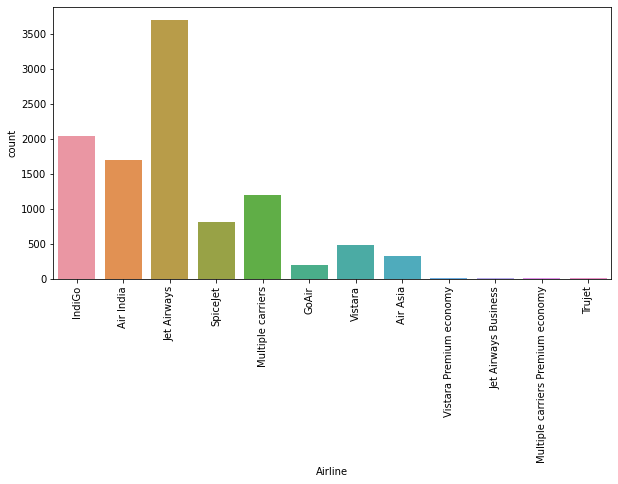

In [99]:
plt.figure(figsize = (10,5))
sns.countplot(x='Airline' , data = flight).set_xticklabels(labels = (flight['Airline'].unique()).tolist() , rotation = 90)
plt.show()

As evident in the graph , the last four values are very less in number so I have encoded them into a single
value . This helped in increasing the performance of all the models significantly . The same process was followed for the columns
“Total_stops” and “Additional_info” 

In [100]:
flight['Airline'] = flight['Airline'].replace(['IndiGo' , 'Air India' , 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir' , 'Vistara' , 'Air Asia' , 'Vistara Premium economy' , 'Jet Airways Business' , 'Multiple carriers Premium economy' , 'Trujet'] , [1,2,3,4 ,5,6,7,8,6,6,6,6])
flight['Airline'] = flight['Airline'].astype(int)

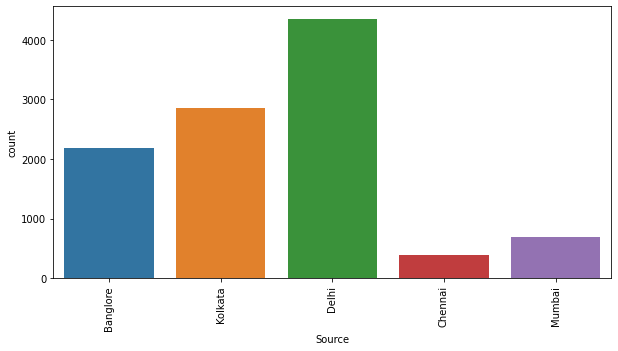

In [101]:
plt.figure(figsize = (10,5))
sns.countplot(x='Source' , data = flight).set_xticklabels(labels = (flight['Source'].unique()).tolist() , rotation = 90)
plt.show()

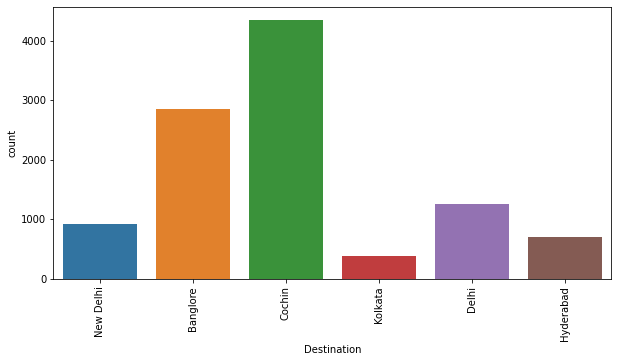

In [102]:
plt.figure(figsize = (10,5))
sns.countplot(x='Destination' , data = flight).set_xticklabels(labels = (flight['Destination'].unique()).tolist() , rotation = 90)
plt.show()

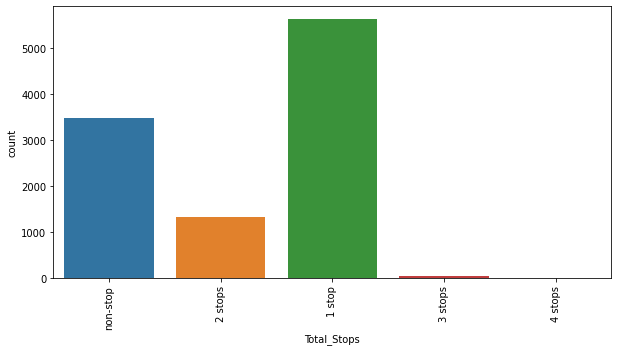

In [103]:
plt.figure(figsize = (10,5))
sns.countplot(x='Total_Stops' , data = flight).set_xticklabels(labels = (flight['Total_Stops'].unique()).tolist() , rotation = 90)
plt.show()

In [104]:
flight['Total_Stops'] = flight['Total_Stops'].replace(['non-stop' , '1 stop' , '2 stops' , '3 stops' , '4 stops'] , [0,1,2,3,3])
flight['Total_Stops'] = flight['Total_Stops'].astype(int)

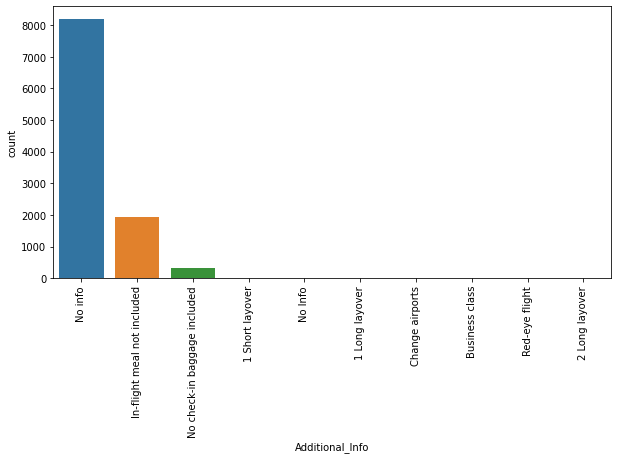

In [105]:
plt.figure(figsize = (10,5))
sns.countplot(x='Additional_Info' , data = flight).set_xticklabels(labels = (flight['Additional_Info'].unique()).tolist() , rotation = 90)
plt.show()

In [106]:
flight['Additional_Info'] = flight['Additional_Info'].replace(['No info', 'No Info' , 'In-flight meal not included' , 'No check-in baggage included' , '1 Short layover' , '1 Long layover' ,'Change airports' , 'Business class' ,  'Red-eye flight','2 Long layover'  ] , [0,0,1,2,3,3,3,3,3,3])
flight['Additional_Info'] = flight['Additional_Info'].astype(int)

In [107]:
np.unique(flight['Date_of_Journey'])

array(['01/03/2019', '03/03/2019', '06/03/2019', '09/03/2019',
       '1/03/2019', '1/04/2019', '1/05/2019', '1/06/2019', '12/03/2019',
       '12/04/2019', '12/05/2019', '12/06/2019', '15/03/2019',
       '15/04/2019', '15/05/2019', '15/06/2019', '18/03/2019',
       '18/04/2019', '18/05/2019', '18/06/2019', '21/03/2019',
       '21/04/2019', '21/05/2019', '21/06/2019', '24/03/2019',
       '24/04/2019', '24/05/2019', '24/06/2019', '27/03/2019',
       '27/04/2019', '27/05/2019', '27/06/2019', '3/03/2019', '3/04/2019',
       '3/05/2019', '3/06/2019', '6/03/2019', '6/04/2019', '6/05/2019',
       '6/06/2019', '9/03/2019', '9/04/2019', '9/05/2019', '9/06/2019'],
      dtype=object)

##Preprocessing of the column : Date of Journey 



I have separated the Date of Journey into three different columns : year , month and Date . But the year column only has one value i.e. 2019 so I dropped that column .

 Morever I created a new column called Day which contains the information of the day for the corresponding date . This is because the flight prices are usually higher on the weekends so it will good for the training the model . 1 stands for Monday , 2 stands for Tuesday and so on ....

In [108]:
s = '01/03/2019'
a = s.split("/")
d  =int(a[0])
m = int(a[1])
y = int(a[2])
date(y , m , d).weekday()

4

In [109]:
day = []
for DATE in flight['Date_of_Journey']:
  a = DATE.split("/")
  d  =int(a[0])
  m = int(a[1])
  y = int(a[2])
  day.append(date(y , m , d).weekday() + 1)
flight['Day'] = day

In [207]:
print("Average price of Flight tickets on Sunday : " , flight[flight['Day'] == 7]['Price'].mean())
print("Average price of Flight tickets on Monday : " , flight[flight['Day'] == 1]['Price'].mean())

Average price of Flight tickets on Sunday :  9532.548654244307
Average price of Flight tickets on Monday :  8402.193691200886


So creating the Weekday column was a good choice as cleary the average price of tickets is much higher on weekend than on weekdays

In [110]:
Date = []
month = []
year = []
for date in flight['Date_of_Journey']:
  info = date.split("/")
  if(info[0][0] == '0'):
    Date.append(int(info[0][1]))
  else:
    Date.append(int(info[0]))
  month.append(int(info[1][1]))
  year.append(int(info[2]))
flight['Date'] = Date
flight['Month'] = month
flight['Year'] = year
flight = flight.drop(columns = 'Date_of_Journey')

In [111]:
np.unique(flight['Month'])

array([3, 4, 5, 6])

In [112]:
np.unique(flight['Date'])

array([ 1,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [113]:
np.unique(flight['Year'])

array([2019])

Dropping the Year columns as there is only one value here

In [114]:
flight = flight.drop(columns = 'Year')

##Preprocessing of the column : Departure Time





I have seperated the Departure Time into the hour and minutes columns so it is easier to visualize

In [115]:
dept_min = []
dept_hour = []
for time in flight['Dep_Time']:
  time = time.split(" ")[0]
  time = time.split(":")
  dept_min.append(int(time[1]))
  dept_hour.append(int(time[0]))
flight['Dept_Min'] = dept_min
flight['Dept_Hour'] = dept_hour
flight = flight.drop(columns = "Dep_Time")


##Preprocessing of the column : Arrival Time


I have seperated the Arrival Time into the hour and minutes columns so it is easier to visualize

In [116]:
arr_min = []
arr_hour = []
for time in flight['Arrival_Time']:
  time = time.split(" ")[0]
  time = time.split(":")
  arr_min.append(int(time[1]))
  arr_hour.append(int(time[0]))
flight['Arrival_Min'] = arr_min
flight['Arrival_Hour'] = arr_hour
flight = flight.drop(columns = "Arrival_Time")


##Preprocessing of the column : Duration


I converted the Duration column into Duration in minutes because some flights were less than an hour and overall the duration of flight is a really important factor in the price of the flight

In [117]:
duration = []
for dur in flight['Duration']:
  dur = dur.split(" ")
  if dur[0][1] == 'm':
    time = int(dur[0][0])
  else:
    hour = int(dur[0].split("h")[0])
    if len(dur) != 1 :
      min = int(dur[1].split("m")[0])
      time = hour*60 + min
    else:
      time = hour  
  duration.append(int(time))
flight['Duration'] = duration


##Preprocessing of the column : Route


The Route column is very important and it can't be ignored . There are at most 6 cities in the route column . I have seperated the route column into 4 columns with First city , Second City ..... Fourth City since the Source and Destination are already present . If the route contains only 3 cities then only the First city column is filled and the rest are filled with 'None' value . These columns will then be label encoded

In [118]:
city1 = []
city2 = []
city3 = []
city4 = []
for i in flight['Route']:
  arr = i.split(" →")
  b = arr[1:-1]
  if(len(b) == 0):
    city1.append("None")
    city2.append("None")
    city3.append("None")
    city4.append("None")
  elif(len(b) == 1):
    city1.append(b[0])
    city2.append("None")
    city3.append("None")
    city4.append("None")
  elif(len(b) == 2):
    city1.append(b[0])
    city2.append(b[1])
    city3.append("None")
    city4.append("None")
  elif(len(b) == 3):
    city1.append(b[0])
    city2.append(b[1])
    city3.append(b[2])
    city4.append("None")
  elif(len(b) == 4):
    city1.append(b[0])
    city2.append(b[1])
    city3.append(b[2])
    city4.append(b[3])
flight['First_stop'] = city1
flight['Second_stop'] = city2
flight['Third_stop'] = city3
flight['Fourth_stop'] = city4
flight = flight.drop(columns = "Route")

In [119]:
flight

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Dept_Min,Dept_Hour,Arrival_Min,Arrival_Hour,First_stop,Second_stop,Third_stop,Fourth_stop
0,1,Banglore,New Delhi,170,0,0,3897,7,24,3,20,22,10,1,None,None,None,None
1,2,Kolkata,Banglore,445,2,0,7662,3,1,5,50,5,15,13,IXR,BBI,None,None
2,3,Delhi,Cochin,19,2,0,13882,7,9,6,25,9,25,4,LKO,BOM,None,None
3,1,Kolkata,Banglore,325,1,0,6218,7,12,5,5,18,30,23,NAG,None,None,None
4,1,Banglore,New Delhi,285,1,0,13302,5,1,3,50,16,35,21,NAG,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,Kolkata,Banglore,150,0,0,4107,2,9,4,55,19,25,22,None,None,None,None
10679,2,Kolkata,Banglore,155,0,0,4145,6,27,4,45,20,20,23,None,None,None,None
10680,3,Banglore,Delhi,3,0,0,7229,6,27,4,20,8,20,11,None,None,None,None
10681,7,Banglore,New Delhi,160,0,0,12648,5,1,3,30,11,10,14,None,None,None,None


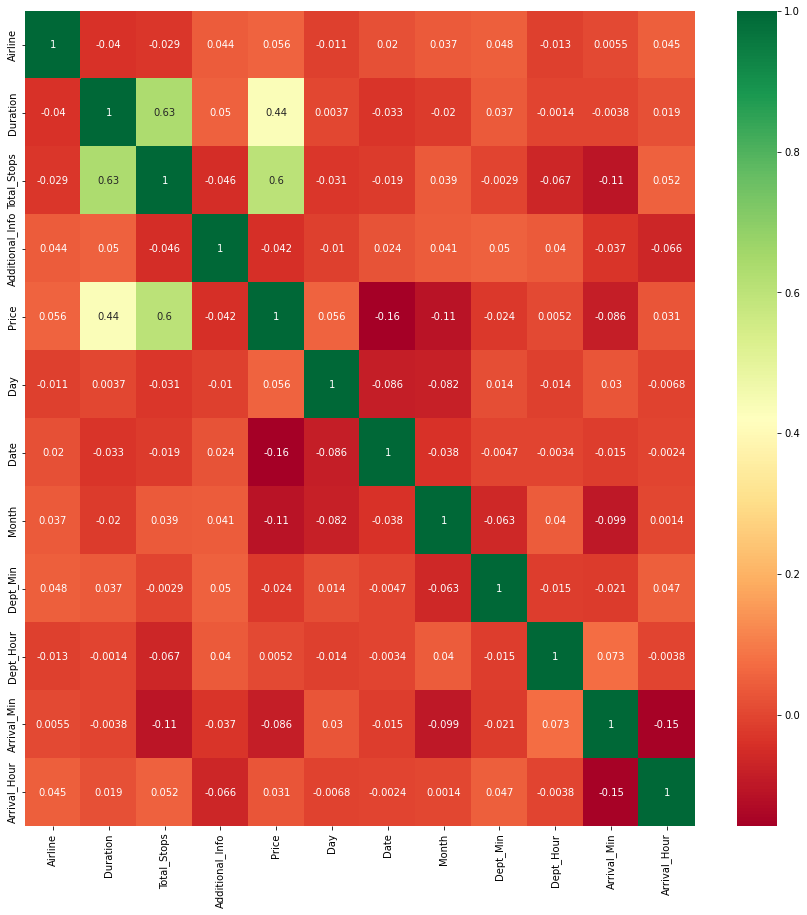

In [120]:
plt.figure(figsize = (15,15))
sns.heatmap(flight.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [121]:
flight

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Dept_Min,Dept_Hour,Arrival_Min,Arrival_Hour,First_stop,Second_stop,Third_stop,Fourth_stop
0,1,Banglore,New Delhi,170,0,0,3897,7,24,3,20,22,10,1,None,None,None,None
1,2,Kolkata,Banglore,445,2,0,7662,3,1,5,50,5,15,13,IXR,BBI,None,None
2,3,Delhi,Cochin,19,2,0,13882,7,9,6,25,9,25,4,LKO,BOM,None,None
3,1,Kolkata,Banglore,325,1,0,6218,7,12,5,5,18,30,23,NAG,None,None,None
4,1,Banglore,New Delhi,285,1,0,13302,5,1,3,50,16,35,21,NAG,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,Kolkata,Banglore,150,0,0,4107,2,9,4,55,19,25,22,None,None,None,None
10679,2,Kolkata,Banglore,155,0,0,4145,6,27,4,45,20,20,23,None,None,None,None
10680,3,Banglore,Delhi,3,0,0,7229,6,27,4,20,8,20,11,None,None,None,None
10681,7,Banglore,New Delhi,160,0,0,12648,5,1,3,30,11,10,14,None,None,None,None


##Encoding the Categorical Columns

In [122]:
print(np.unique(flight['First_stop']))
print(np.unique(flight['Second_stop']))
print(np.unique(flight['Third_stop']))
print(np.unique(flight['Fourth_stop']))

[' AMD' ' ATQ' ' BBI' ' BDQ' ' BHO' ' BLR' ' BOM' ' CCU' ' COK' ' DED'
 ' DEL' ' GAU' ' GOI' ' GWL' ' HBX' ' HYD' ' IDR' ' IXA' ' IXB' ' IXC'
 ' IXR' ' IXU' ' IXZ' ' JAI' ' JDH' ' JLR' ' KNU' ' LKO' ' MAA' ' NAG'
 ' NDC' ' PAT' ' PNQ' ' RPR' ' STV' ' TRV' ' UDR' ' VGA' ' VNS' ' VTZ'
 'None']
[' AMD' ' BBI' ' BHO' ' BOM' ' CCU' ' COK' ' DEL' ' GAU' ' GOI' ' HBX'
 ' HYD' ' IDR' ' IMF' ' ISK' ' IXC' ' IXR' ' JAI' ' JDH' ' MAA' ' NAG'
 ' PNQ' ' TRV' ' UDR' ' VGA' ' VTZ' 'None']
[' AMD' ' BBI' ' BHO' ' BOM' ' DEL' ' GWL' ' HYD' ' NAG' ' TRV' 'None']
[' VGA' 'None']


In [123]:
le = LabelEncoder()
categorical_columns = [ 'Source' , 'Destination' , 'First_stop' , 'Second_stop' , 'Third_stop' , 'Fourth_stop']
for col in categorical_columns:
  flight[col] = le.fit_transform(flight[col])

This completes the preprocessing of the data . Now the dataset looks like this

In [124]:
flight

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Date,Month,Dept_Min,Dept_Hour,Arrival_Min,Arrival_Hour,First_stop,Second_stop,Third_stop,Fourth_stop
0,1,0,5,170,0,0,3897,7,24,3,20,22,10,1,40,25,9,1
1,2,3,0,445,2,0,7662,3,1,5,50,5,15,13,20,1,9,1
2,3,2,1,19,2,0,13882,7,9,6,25,9,25,4,27,3,9,1
3,1,3,0,325,1,0,6218,7,12,5,5,18,30,23,29,25,9,1
4,1,0,5,285,1,0,13302,5,1,3,50,16,35,21,29,25,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,3,0,150,0,0,4107,2,9,4,55,19,25,22,40,25,9,1
10679,2,3,0,155,0,0,4145,6,27,4,45,20,20,23,40,25,9,1
10680,3,0,2,3,0,0,7229,6,27,4,20,8,20,11,40,25,9,1
10681,7,0,5,160,0,0,12648,5,1,3,30,11,10,14,40,25,9,1


In [125]:
X = flight.drop(columns = 'Price')
y = flight.Price
x_train , x_test , y_train , y_test = tts(X, y, test_size = 0.2 , shuffle = True , random_state = 1)

#Implementing Different Models

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

model = []
model.append(RandomForestRegressor())
model.append(svm.SVR(kernel = 'rbf'))
model.append(ExtraTreesRegressor())
model.append(LinearRegression())
model.append(DecisionTreeRegressor())
model.append(xgb.XGBRegressor(objective='reg:squarederror'))
model.append(lgb.LGBMRegressor())
model.append(KNeighborsRegressor())

In [195]:
!pip install tabulate
from tabulate import tabulate
from sklearn.model_selection import cross_val_score as cv

In [196]:
table = [["Model" , "Training R2 score" , "Testing R2 score" , "Cross Val 1", "Cross Val 2", "Cross Val 3", "Cross Val 4", "Cross Val 5"]]
k = 0
for reg in model:
  cross_val = cv(reg , x_train , y_train , scoring = 'r2')
  reg.fit(x_train , y_train)
  ind_reg = [reg , r2(y_train , reg.predict(x_train)) ,  r2(y_test , reg.predict(x_test)) ]
  for i in cross_val:
    ind_reg.append(i)
  table.append(ind_reg)

In [197]:
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤═════════════════════╤════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Model                                      │   Training R2 score │   Testing R2 score │   Cross Val 1 │   Cross Val 2 │   Cross Val 3 │   Cross Val 4 │   Cross Val 5 │
╞════════════════════════════════════════════╪═════════════════════╪════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ RandomForestRegressor()                    │            0.980611 │           0.918029 │      0.899365 │      0.913598 │      0.854268 │     0.908443  │     0.816592  │
├────────────────────────────────────────────┼─────────────────────┼────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│ SVR()                                      │            0.108888 │           0.111677 │      0.11098  │      0.100218 │      0.100832 │     0.070046

#Tuning the best model : RandomForestRegressor

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from datetime import time
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [131]:
param_dist = {
'n_estimators': list(range(100, 1000, 10)),
'min_samples_leaf': list(range(1, 25)),
'max_depth': list(range(2, 20)),
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}

In [132]:
rfc = RandomForestRegressor()
n_iter = 50
model_random_search = RandomizedSearchCV(
estimator=rfc,
param_distributions=param_dist,
n_iter=n_iter)

In [133]:
model_random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150, 160, 170,
                   

In [134]:
model_random_search.best_params_

{'bootstrap': False,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 850}

In [135]:
rfc = model_random_search.best_estimator_
rfc.fit(x_train , y_train)
table = [['Data' , 'R2 score' , 'MSE' , 'MAE']]
table.append(["Training" , r2(y_train , rfc.predict(x_train)) , mse(y_train , rfc.predict(x_train)) , mae(y_train , rfc.predict(x_train))])
table.append(["Testing" , r2(y_test , rfc.predict(x_test)) , mse(y_test , rfc.predict(x_test)) , mae(y_test , rfc.predict(x_test))])
print(tabulate(table ,headers = 'firstrow' ,  tablefmt='fancy_grid'))

╒══════════╤════════════╤══════════════════╤═════════╕
│ Data     │   R2 score │              MSE │     MAE │
╞══════════╪════════════╪══════════════════╪═════════╡
│ Training │   0.959315 │ 877717           │ 597.733 │
├──────────┼────────────┼──────────────────┼─────────┤
│ Testing  │   0.89459  │      2.17555e+06 │ 896.325 │
╘══════════╧════════════╧══════════════════╧═════════╛


#Implementing the Pipeline

In [177]:
from sklearn.base import BaseEstimator

In [183]:
from sklearn.base import TransformerMixin
class preprocess(BaseEstimator , TransformerMixin):
  def __init__(self):
    print("init() function called")

  def fit(self , X , y = None):
    print("fit() function called")
    return self
  def transform(self , X , y = None):
    from datetime import date
    print("transform() function called")
    X['Airline'] = X['Airline'].replace(['IndiGo' , 'Air India' , 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir' , 'Vistara' , 'Air Asia' , 'Vistara Premium economy' , 'Jet Airways Business' , 'Multiple carriers Premium economy' , 'Trujet'] , [1,2,3,4 ,5,6,7,8,6,6,6,6])
    X['Airline'] = X['Airline'].astype(int)
    X['Total_Stops'] = X['Total_Stops'].replace(['non-stop' , '1 stop' , '2 stops' , '3 stops' , '4 stops'] , [0,1,2,3,3])
    X['Total_Stops'] = X['Total_Stops'].astype(int)
    X['Additional_Info'] = X['Additional_Info'].replace(['No info', 'No Info' , 'In-flight meal not included' , 'No check-in baggage included' , '1 Short layover' , '1 Long layover' ,'Change airports' , 'Business class' ,  'Red-eye flight','2 Long layover'  ] , [0,0,1,2,3,3,3,3,3,3])
    X['Additional_Info'] = X['Additional_Info'].astype(int)

    day = []
    for DATE in X['Date_of_Journey']:
      a = DATE.split("/")
      d  =int(a[0])
      m = int(a[1])
      y = int(a[2])
      day.append(date(y , m , d).weekday() + 1)
    X['Day'] = day

    Date = []
    month = []
    year = []
    for date in X['Date_of_Journey']:
      info = date.split("/")
      if(info[0][0] == '0'):
        Date.append(int(info[0][1]))
      else:
        Date.append(int(info[0]))
      month.append(int(info[1][1]))
      year.append(int(info[2]))
    X['Date'] = Date
    X['Month'] = month
    X = X.drop(columns = 'Date_of_Journey')

    dept_min = []
    dept_hour = []
    for time in X['Dep_Time']:
      time = time.split(" ")[0]
      time = time.split(":")
      dept_min.append(int(time[1]))
      dept_hour.append(int(time[0]))
    X['Dept_Min'] = dept_min
    X['Dept_Hour'] = dept_hour
    X = X.drop(columns = "Dep_Time")

    arr_min = []
    arr_hour = []
    for time in X['Arrival_Time']:
      time = time.split(" ")[0]
      time = time.split(":")
      arr_min.append(int(time[1]))
      arr_hour.append(int(time[0]))
    X['Arrival_Min'] = arr_min
    X['Arrival_Hour'] = arr_hour
    X = X.drop(columns = "Arrival_Time")

    duration = []
    for dur in X['Duration']:
      dur = dur.split(" ")
      if dur[0][1] == 'm':
        time = int(dur[0][0])
      else:
        hour = int(dur[0].split("h")[0])
        if len(dur) != 1 :
          min = int(dur[1].split("m")[0])
          time = hour*60 + min
        else:
          time = hour  
      duration.append(int(time))
    X['Duration'] = duration

    city1 = []
    city2 = []
    city3 = []
    city4 = []
    for i in X['Route']:
      arr = i.split(" →")
      b = arr[1:-1]
      if(len(b) == 0):
        city1.append("None")
        city2.append("None")
        city3.append("None")
        city4.append("None")
      elif(len(b) == 1):
        city1.append(b[0])
        city2.append("None")
        city3.append("None")
        city4.append("None")
      elif(len(b) == 2):
        city1.append(b[0])
        city2.append(b[1])
        city3.append("None")
        city4.append("None")
      elif(len(b) == 3):
        city1.append(b[0])
        city2.append(b[1])
        city3.append(b[2])
        city4.append("None")
      elif(len(b) == 4):
        city1.append(b[0])
        city2.append(b[1])
        city3.append(b[2])
        city4.append(b[3])
    X['First_stop'] = city1
    X['Second_stop'] = city2
    X['Third_stop'] = city3
    X['Fourth_stop'] = city4
    X = X.drop(columns = "Route")


    le = LabelEncoder()
    categorical_columns = [ 'Source' , 'Destination' , 'First_stop' , 'Second_stop' , 'Third_stop' , 'Fourth_stop']
    for col in categorical_columns:
      X[col] = X[col].replace(np.unique(X[col]) , list(range(1,len(np.unique(X[col])) + 1)))
    return X


In [184]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = [
                         ("preprocess" , preprocess()),
                         ("regressor" , rfc)
])

init() function called


In [185]:
new_data = pd.read_csv("/content/data.csv")
new_data = new_data.dropna()
x_train_new , x_test_new , y_train_new , y_test_new = tts(new_data.drop(columns = 'Price') , new_data.Price , test_size = 0.2 , shuffle = True , random_state = 1)
pipe.fit(x_train_new , y_train_new)

fit() function called
transform() function called


Pipeline(steps=[('preprocess', preprocess()),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=13,
                                       max_features='sqrt',
                                       n_estimators=850))])

In [189]:
y_pred_new = pipe.predict(x_test_new)
print("Predicted values from pipeline :")
print(y_pred_new)

transform() function called
Predicted values from pipeline :
[ 7346.283215   12582.50869573 12703.85112091 ... 13241.38977359
 10430.07382637  7384.36612993]
